# Dataset information

 0   gender  -> (Female/male)         
 1   race/ethnicity ->  (Group A, Group B, Group C )              
 2   parental level of education  -> (associate degree, some college,bachelor's degree, master's degree )
 3   lunch ->  (free/reduced, standard)                   
 4   test preparation course -> (completed, or not completed)     
 5   math score            
 6   reading score                
 7   writing score               



# Data check to perform
1. Check Missing  value
2. Check Duplicats
3. Check Datatypes
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column



In [58]:
import pandas as pd # type: ignore
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Magic command to display plots inline (works only in Jupyter Notebook)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

# Your data analysis or visualization code goes here


In [59]:
df = pd.read_csv("C:\\Users\\Satyam Mishra\\OneDrive\\Desktop\\Project_DataMl\\notebook\\Studentsdata.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [60]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [61]:
df.shape

(1000, 8)

In [62]:
df.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

In [63]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring data

In [64]:
print("Categories in 'gender' variable:  ",end="")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end="")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end="")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [65]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if pd.api.types.is_numeric_dtype(df[feature])]
categorical_features = [feature for feature in df.columns if pd.api.types.is_object_dtype(df[feature])]

# Print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding columns for "Total Score" and "Average


In [66]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [67]:
reading_full= df[df['reading score'] == 100]['average'].count()
writing_full= df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()


print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [68]:
reading_less_30 =  df[df['reading score'] <= 30]['average'].count()
writing_less_30= df[df['writing score'] <= 30]['average'].count()
math_less_30 = df[df['math score'] <= 30]['average'].count()


print(f'Number of students with full marks in Math: {reading_less_30}')
print(f'Number of students with full marks in Writing: {writing_less_30}')
print(f'Number of students with full marks in Reading: {math_less_30}')


Number of students with full marks in Math: 8
Number of students with full marks in Writing: 10
Number of students with full marks in Reading: 16


Insights 
* From above values we get students have performed the worst in Maths
* Best Performance is in reading section

Exploring Data (Visualization)

Visualize average score distribution to make some conclusion
* Histogram
* Kernel Distribution Function(KDE)

Histogram and KDE

Univariate Analysis (Exploring Individual Features)


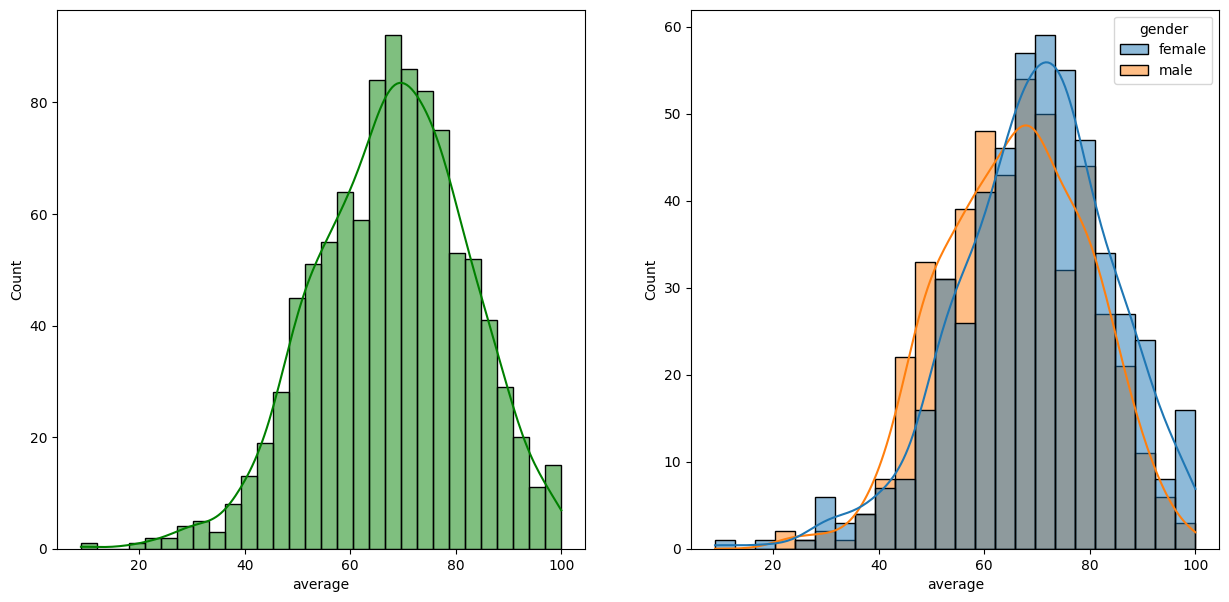

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

In [70]:
import os
print(os.getcwd())

c:\Users\Satyam Mishra\OneDrive\Desktop\Project_DataMl\notebook


* Female students tend to perform well then male students

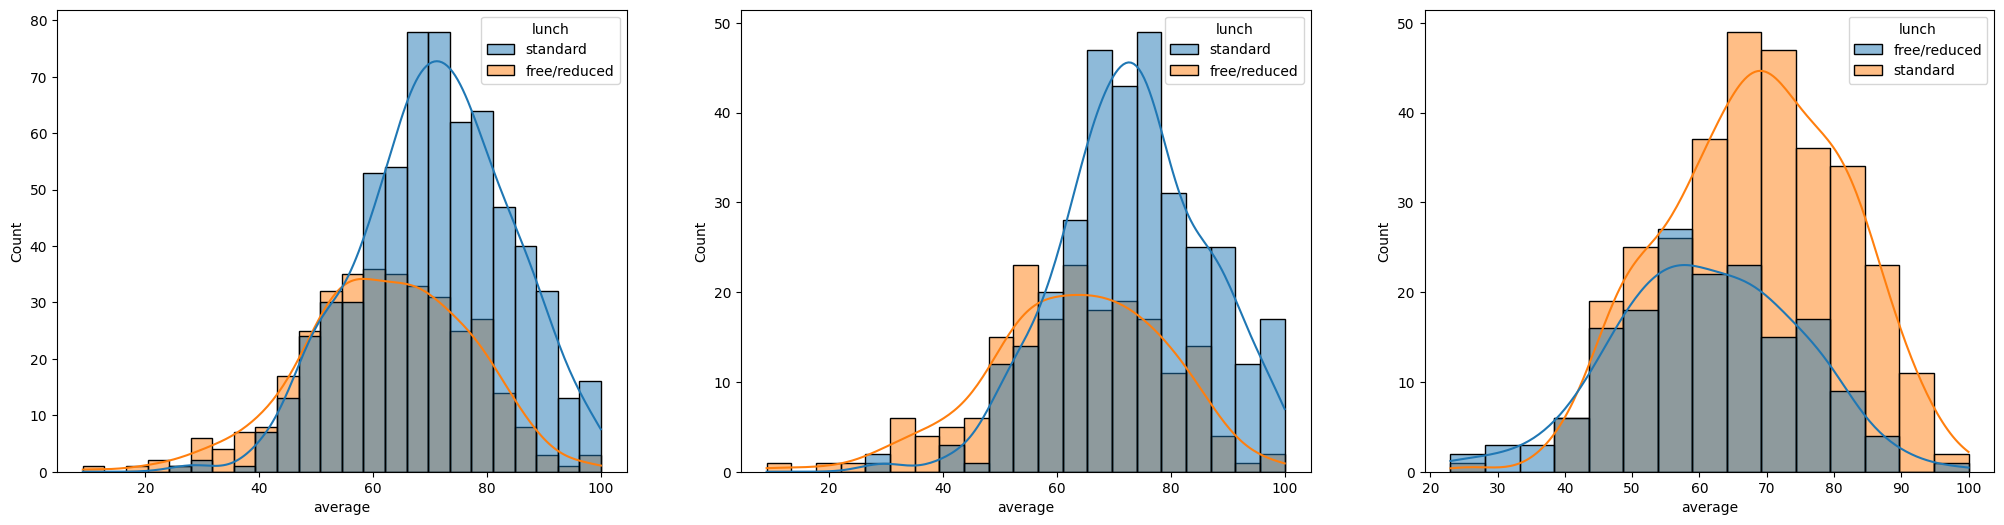

In [71]:
# Set up the figure
plt.figure(figsize=(25, 6))

# First subplot
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.histplot(data=df, x='average', kde=True, hue='lunch')

# Second subplot (only for females)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')

# Third subplot (only for males)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')

# Show the plot
plt.show()

Standard lunch helps perform well in exams
Standard lunch helps perform well in exams for male and female

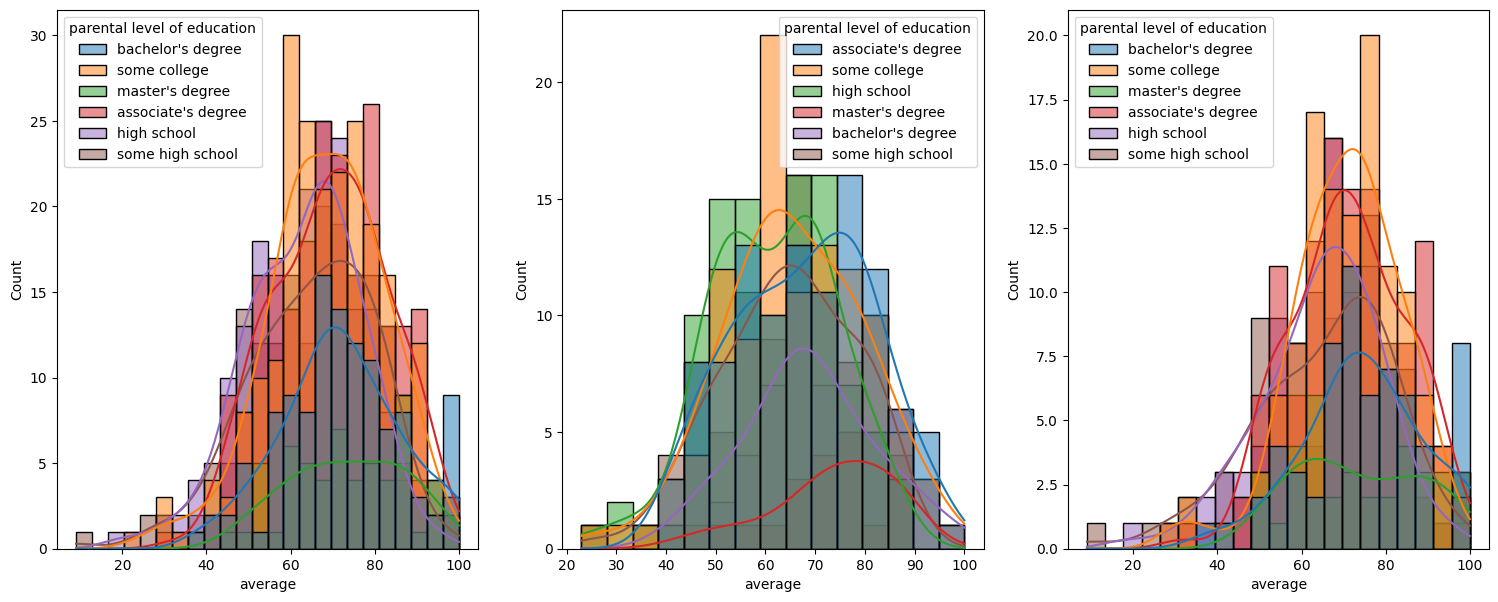

In [72]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)

ax= sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)

ax= sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)

ax= sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.show()

* In general parent's education don't help student perform well in exam.
* 2nd plot whows that parent's whose eduction is of associte's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's eduction on female stduents

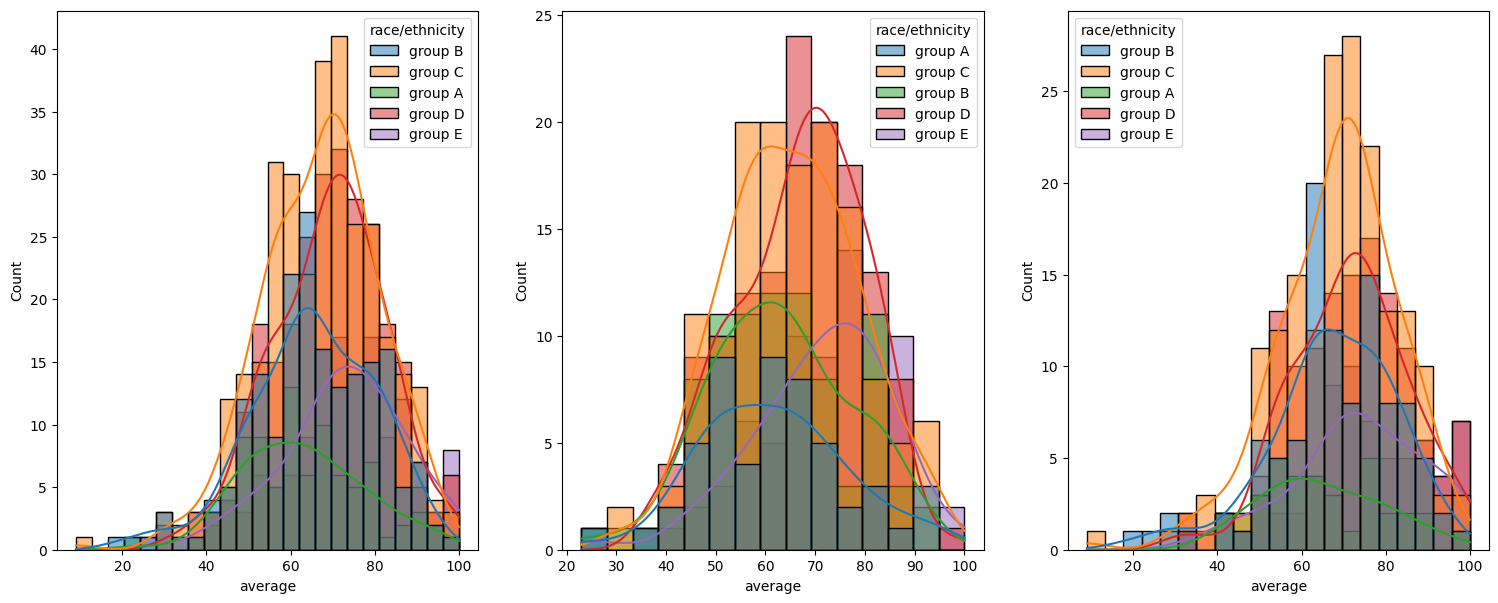

In [73]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)

ax= sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(142)

ax= sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(143)

ax= sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity')
plt.show()

* Students of group A and group B tends to perform poorly in exam
* Students of group B and group B tends to perform poorly in exam irrespective of whether they are male or female 

Maximumum score of students in three subjects

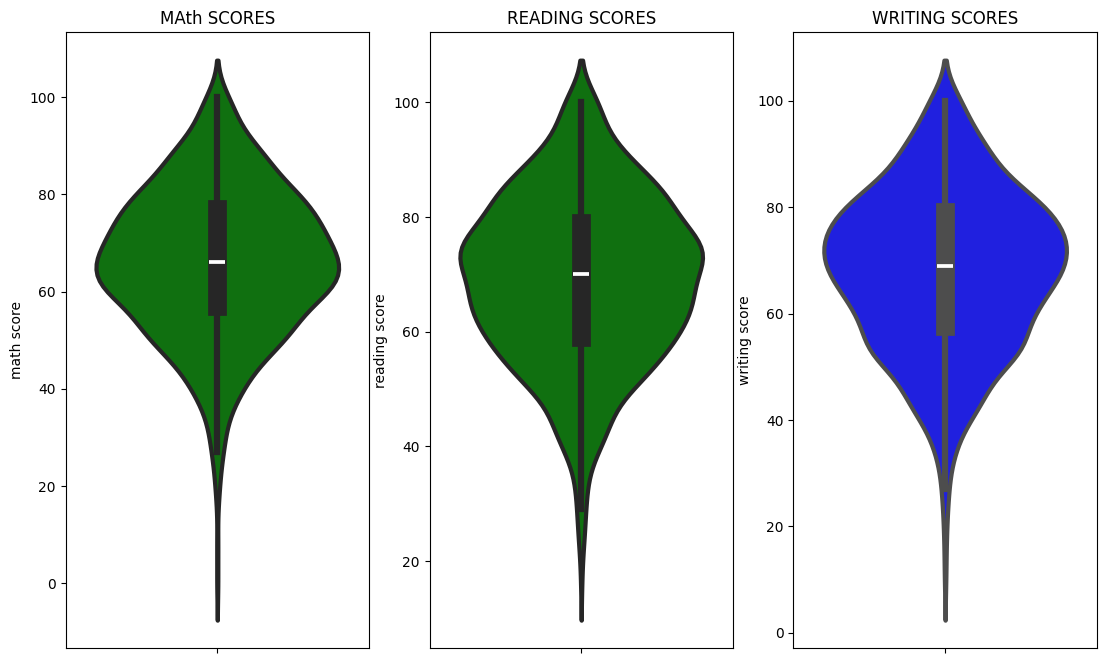

In [74]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MAth SCORES')
sns.violinplot(y='math score' ,data=df, color='green', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score' ,data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

* From the above three plots its clearly visible that most of the studets score in between 60-80 in Maths whereas in reading and writng most of them from 50-80

Multivariate analysis using pieplot

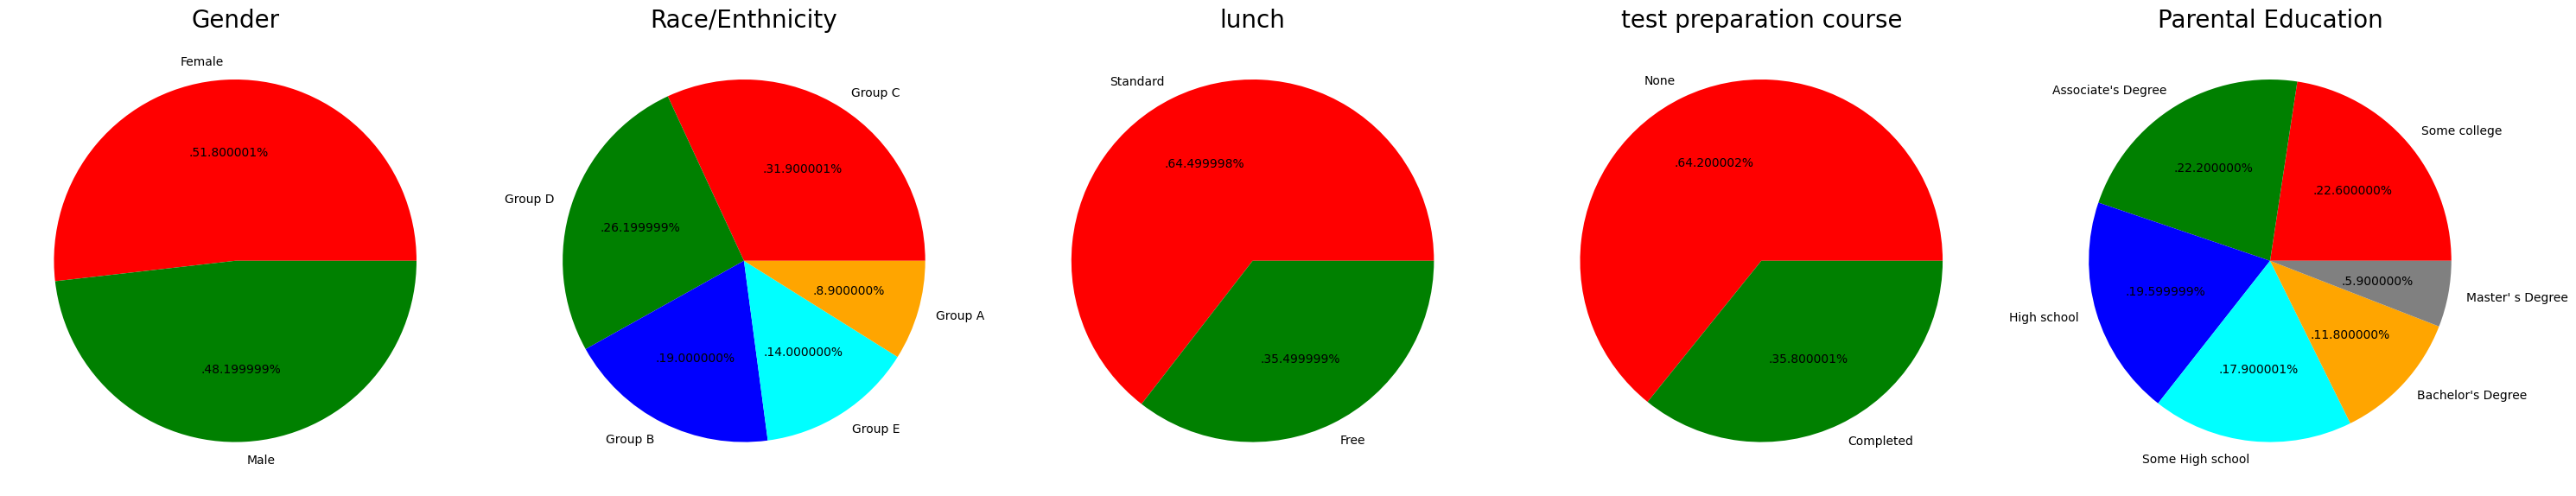

In [75]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels= 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct= '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.axis('off')

plt.pie(size, colors = color, labels = labels, autopct= '.%2f%%')
plt.title('Race/Enthnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct= '.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels= 'None', 'Completed'
color = ['red', 'green']


plt.pie(size, colors = color, labels = labels, autopct= '.%2f%%')
plt.title('test preparation course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some college', "Associate's Degree", 'High school', 'Some High school', "Bachelor's Degree", "Master' s Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']


plt.pie(size, colors = color, labels = labels, autopct= '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid


plt.show()

* Number of Male and Female students is almost equal 
* Number students are greatest in Group C
* Number of students who have standard lunch are greater 
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is grater followed closely by "Associate's Degree.

Feature Wise Visualization 

Gender Column

* How is distribution of Gender?
* Is gender has any impact on student's performance

UNIVARIATE ANALYSIS (How is distribution of Gender?)

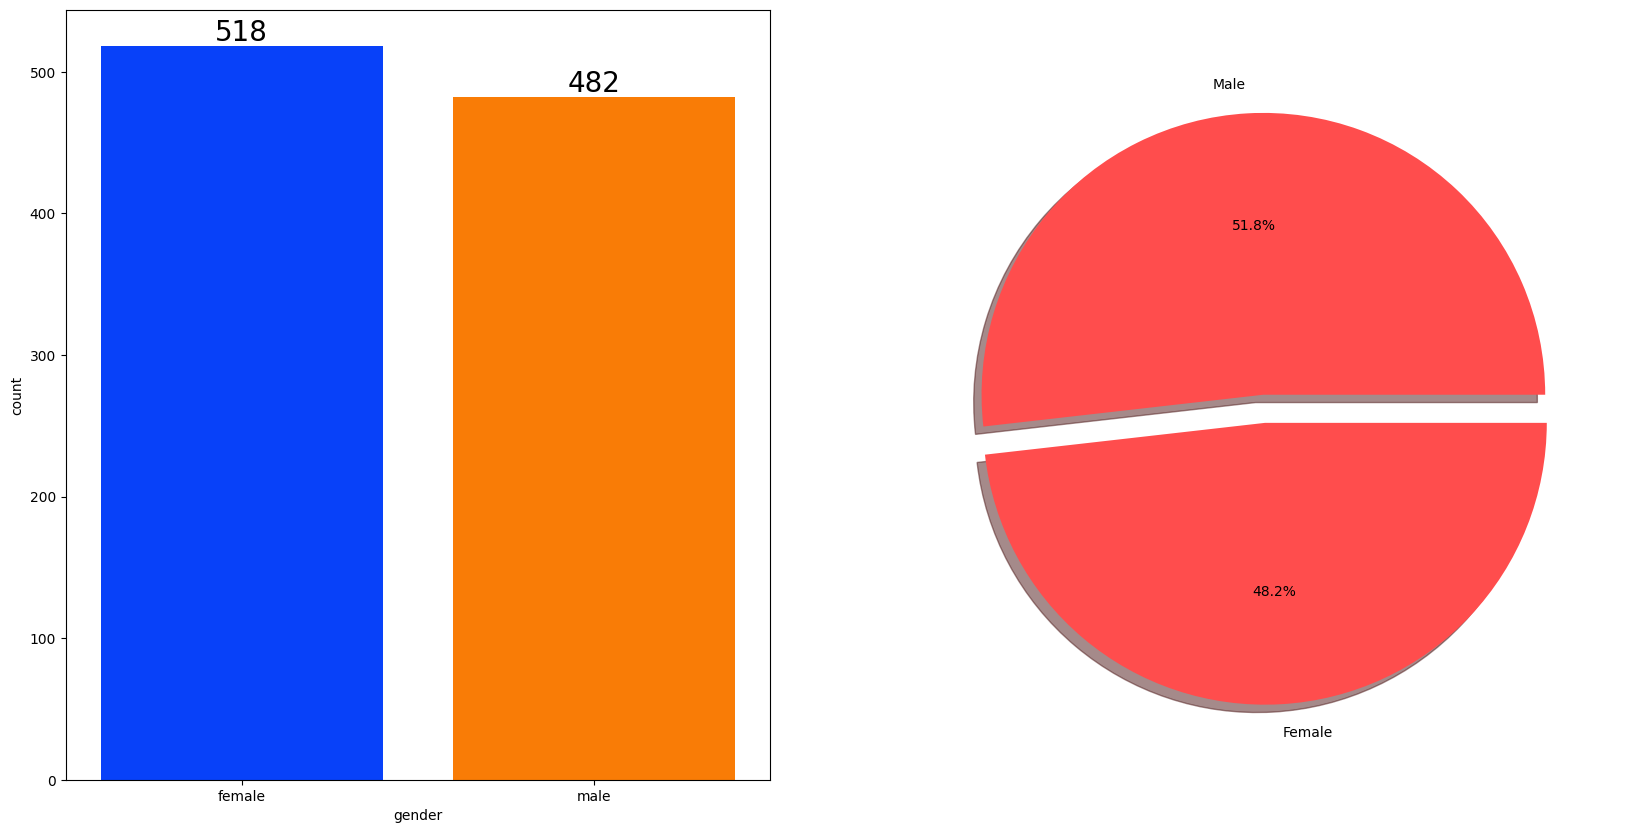

<Figure size 3000x1200 with 0 Axes>

In [76]:
# Create subplots

f, ax=plt.subplots(1, 2, figsize=(20, 10))
# First plot: Countplot for gender
sns.countplot(x = df['gender'], data=df, palette = 'bright', ax=ax[0], saturation=0.95)
# Adding bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
# Second plot: Pie chart for gender distribution
    
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True,colors=['#ff4d4d'])
plt.show() 

# Set titles for clarity
ax[0].set_title('Gender Countplot', fontsize=18)
ax[1].set_title('Gender Distribution Pie Chart', fontsize=18)

# Show the plots
plt.tight_layout()
plt.show()     

* Gender has balanced data with female students are 518(48%) and male students 482(52%)

Bivariate analysis( Is gender has any impact on student's performance ?)

In [77]:
# Filter only the numerical columns
gender_group = df.groupby('gender').mean(numeric_only=True)

# Display the result
gender_group


,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


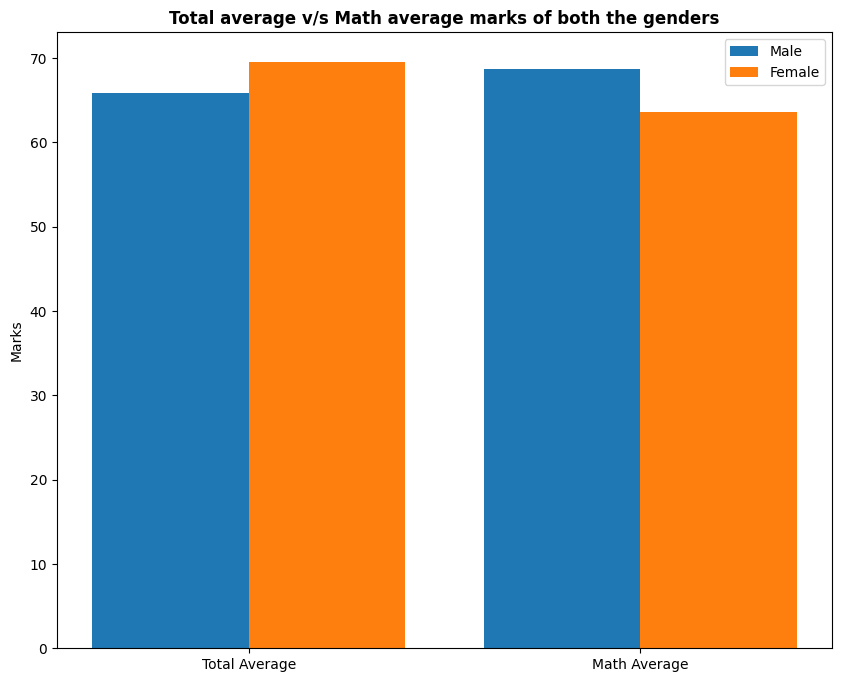

In [78]:
plt.figure(figsize=(10, 8))

x = ['Total Average', 'Math Average']

female_scores = [gender_group['average'] [0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, x)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

* On an average females have a better overall score than men.
* whereas males have scored higher in Maths 

Race/Enthicity column

* How is group wise distribution?
* Is Race/Ehnicity has any impact on student's performance?

Univariate analysis(how is group wise distribution?)

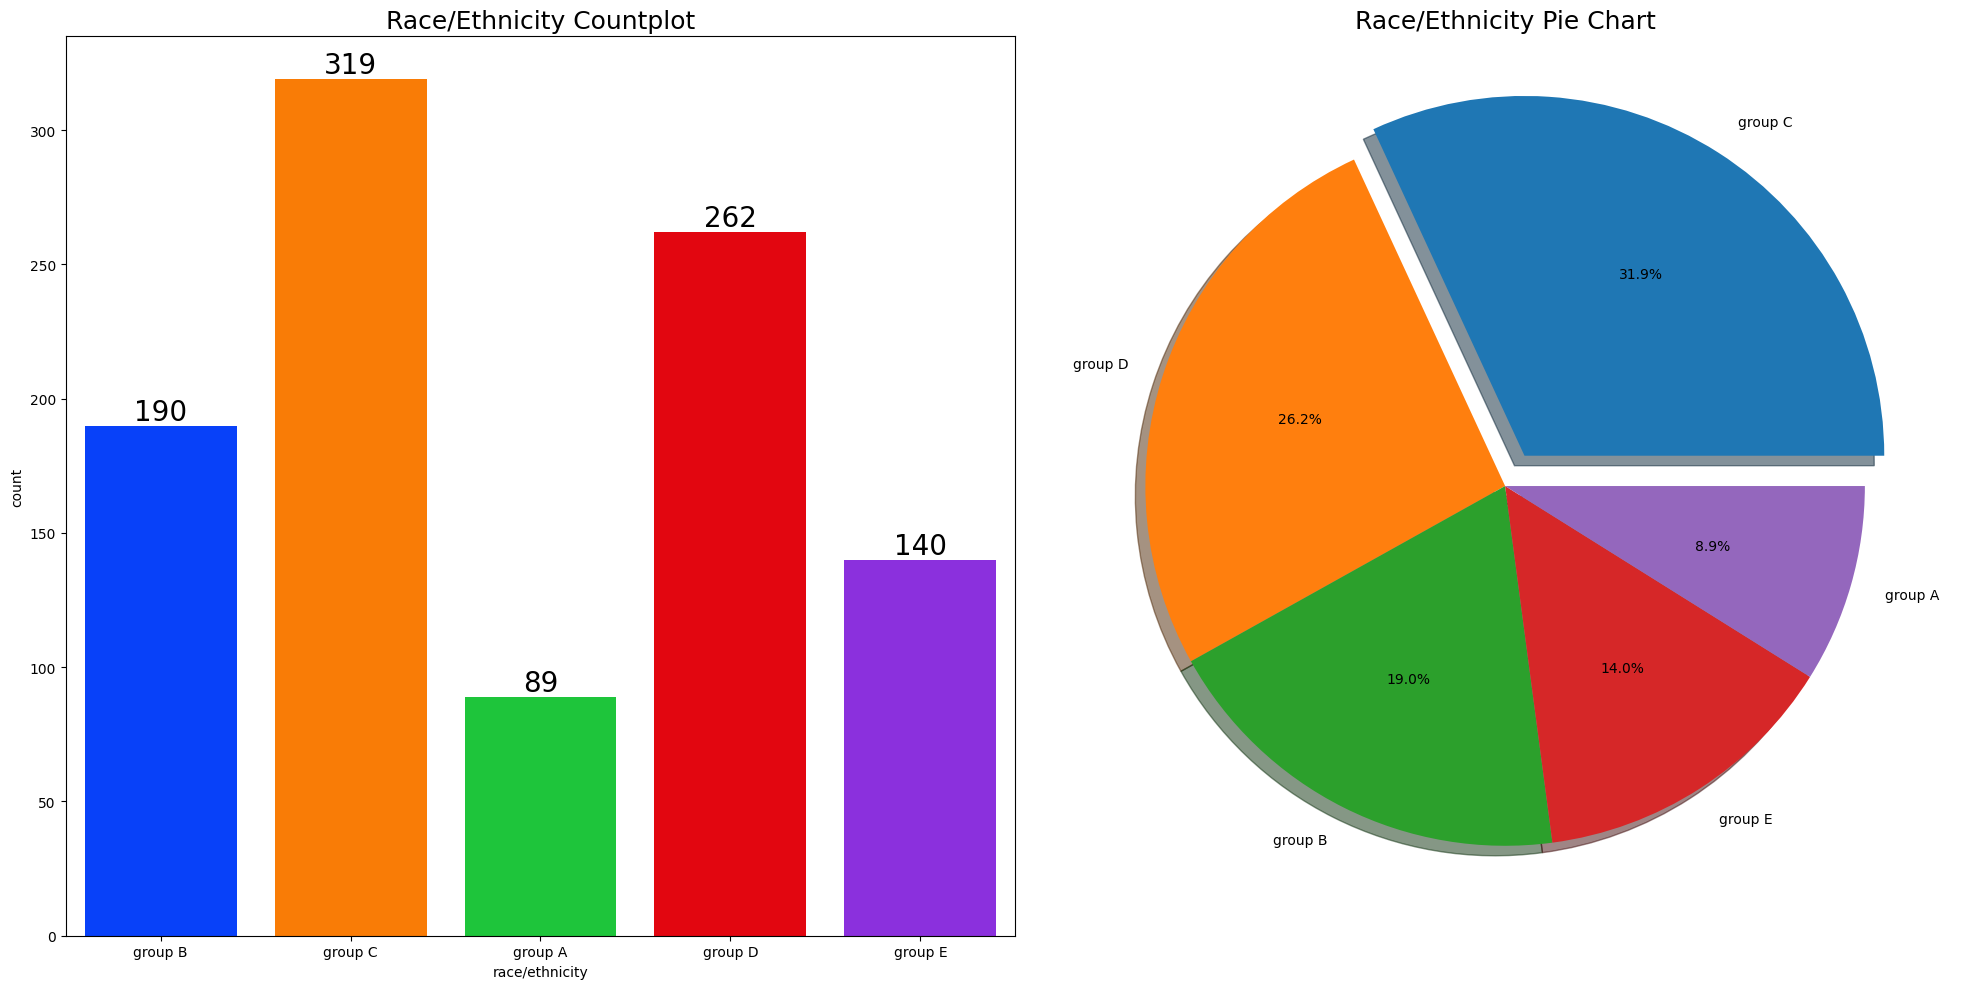

In [82]:

# Create a figure with 2 subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# First subplot: Countplot for race/ethnicity
sns.countplot(x='race/ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)

# Add labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Second subplot: Pie chart for race/ethnicity distribution
ax[1].pie(df['race/ethnicity'].value_counts(), 
          labels=df['race/ethnicity'].value_counts().index, 
          explode=[0.1, 0, 0, 0, 0], 
          autopct='%1.1f%%', 
          shadow=True)

# Set titles for clarity
ax[0].set_title('Race/Ethnicity Countplot', fontsize=18)
ax[1].set_title('Race/Ethnicity Pie Chart', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


* Mos of the student beloning from group C/group D.
* Lowest number of students belong to group A

Parental level of education column

* What is educational backgroud of student's parent?
* Is parental education has any impact on student's performance?


Univeriate analysis( what is educational backgroud of student's parent?)

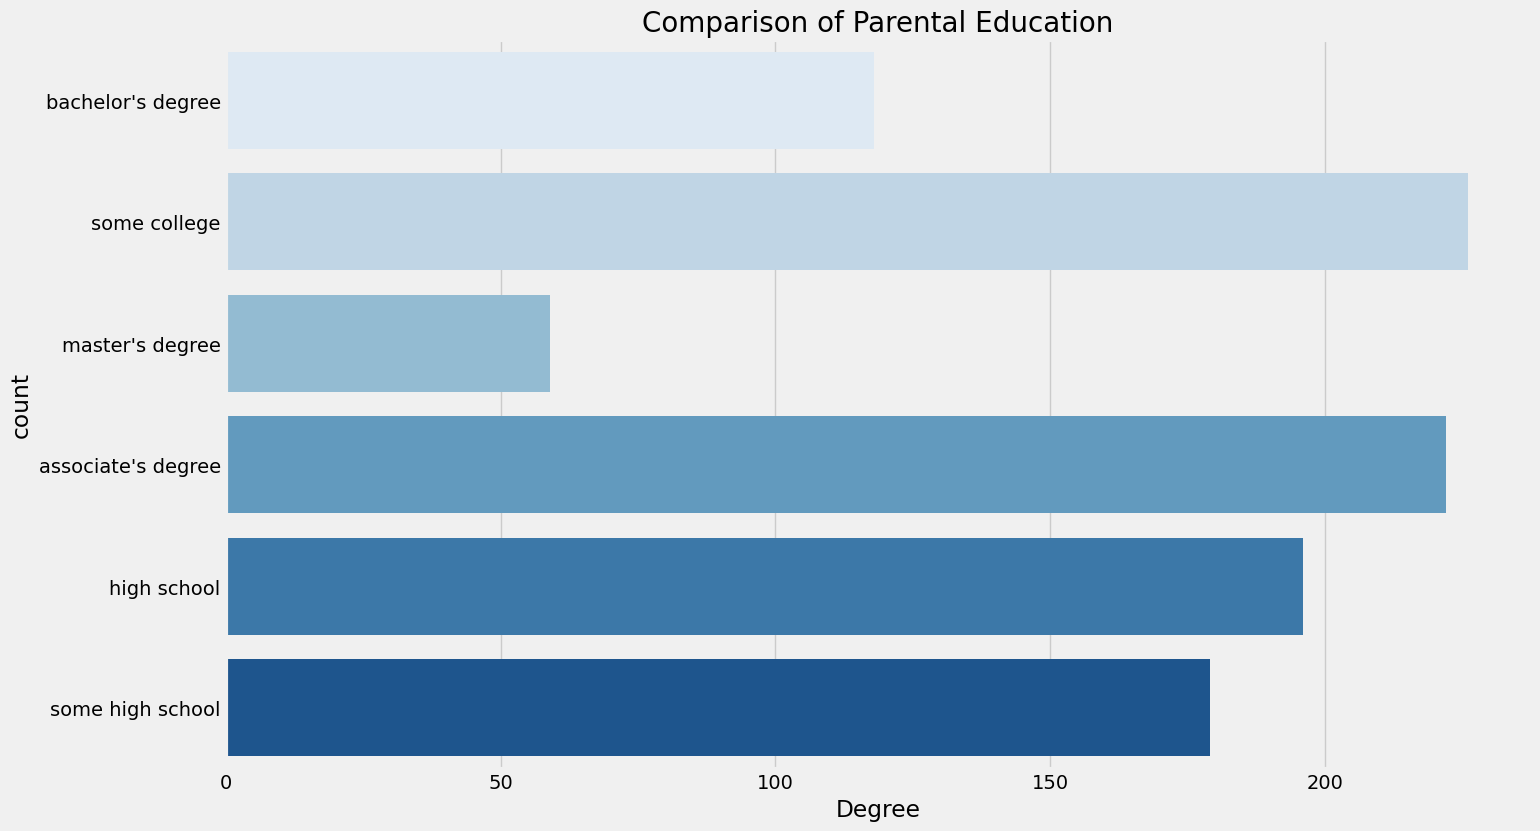

In [83]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette ='Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize= 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

* Largest number of parents are from some college.
* Lowest number of parents are from master's degree

Bivariate analysis( Is parental education has any impact on student's performance?)

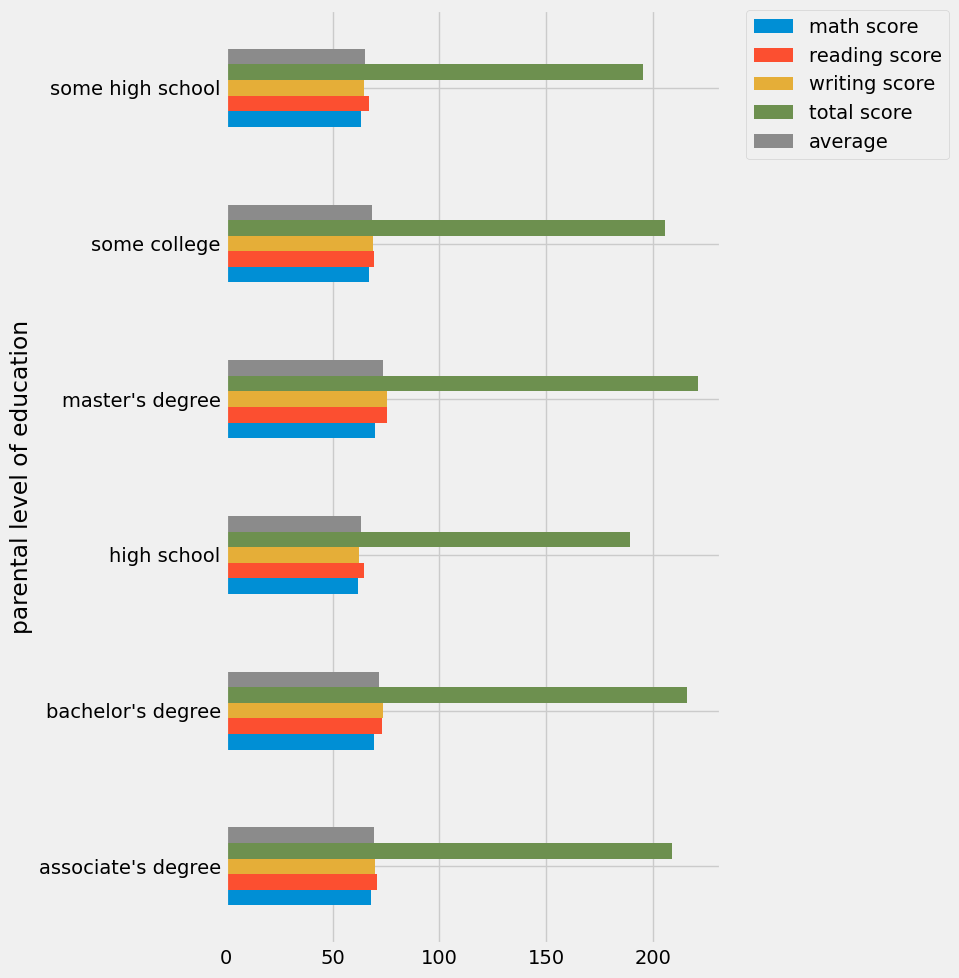

In [86]:
import matplotlib.pyplot as plt

# Group by 'parental level of education' and calculate the mean of numeric columns
df.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))

# Adjust the legend to be outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.tight_layout()
plt.show()


* The score of student whose parents possess master and bachelor level educations are higher then others.

Lunch column

* which type of lunch is most common amoung student?
* What is the effect of lunch types on test results?

Univariate analysis (Which type of lunch is most common amoung students ?)

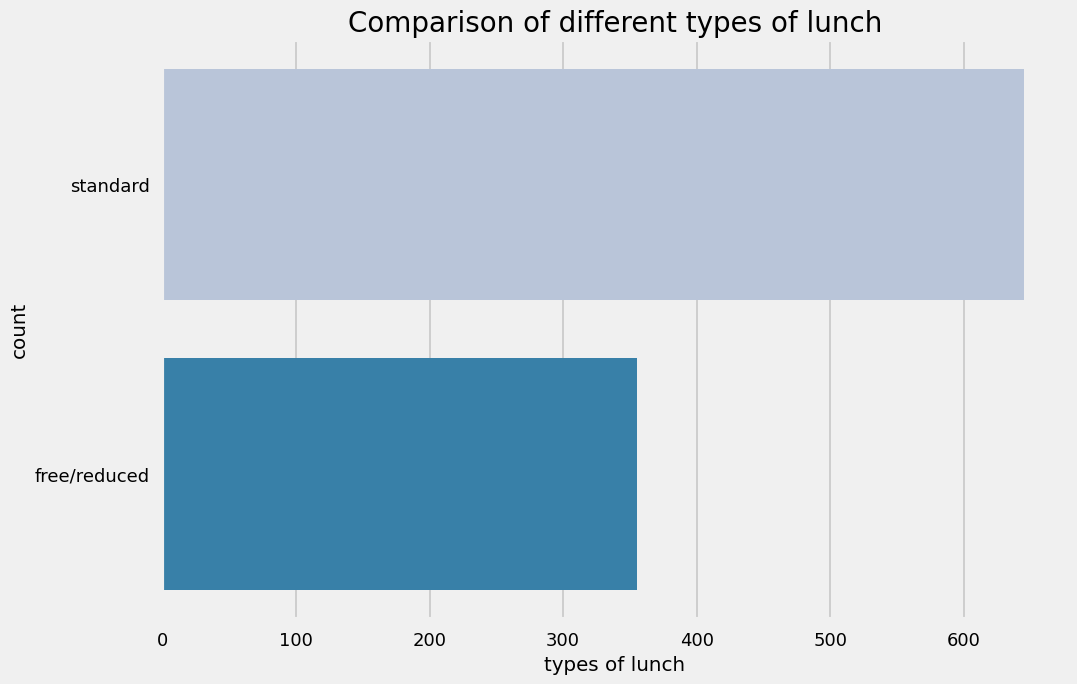

In [87]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

* Students being served Standard lunch was more than free lunch

Bivariate analysis(Is lunch type has any impact on Student's performance)

<Axes: xlabel='lunch', ylabel='writing score'>

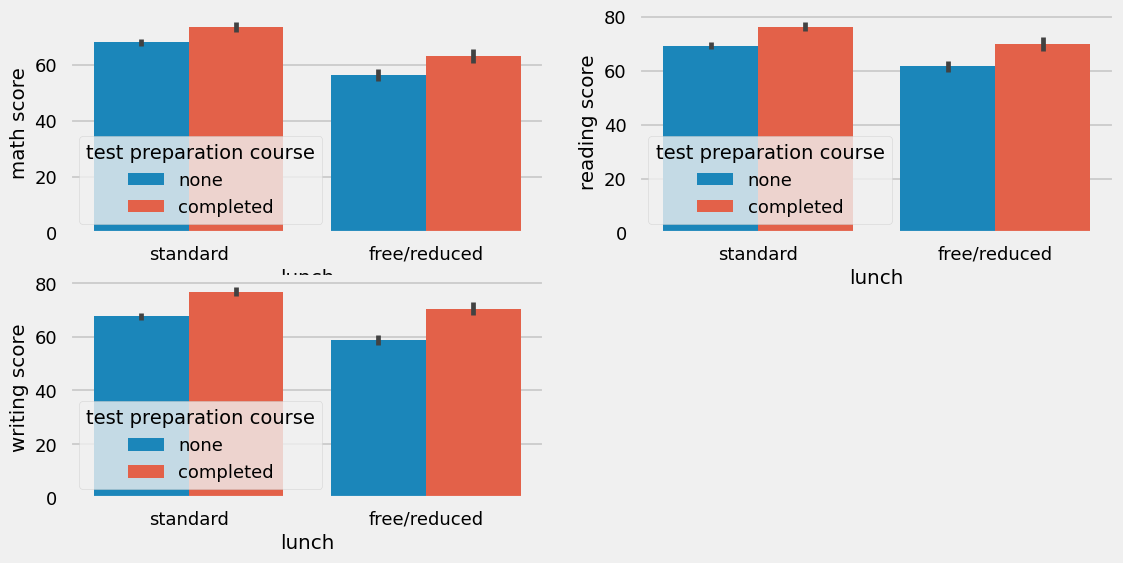

In [89]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.subplot(2,2,3)


Students who have completed the test preparation course have scores higher in all three categories than those who haven't taken the course

Checking Outliers

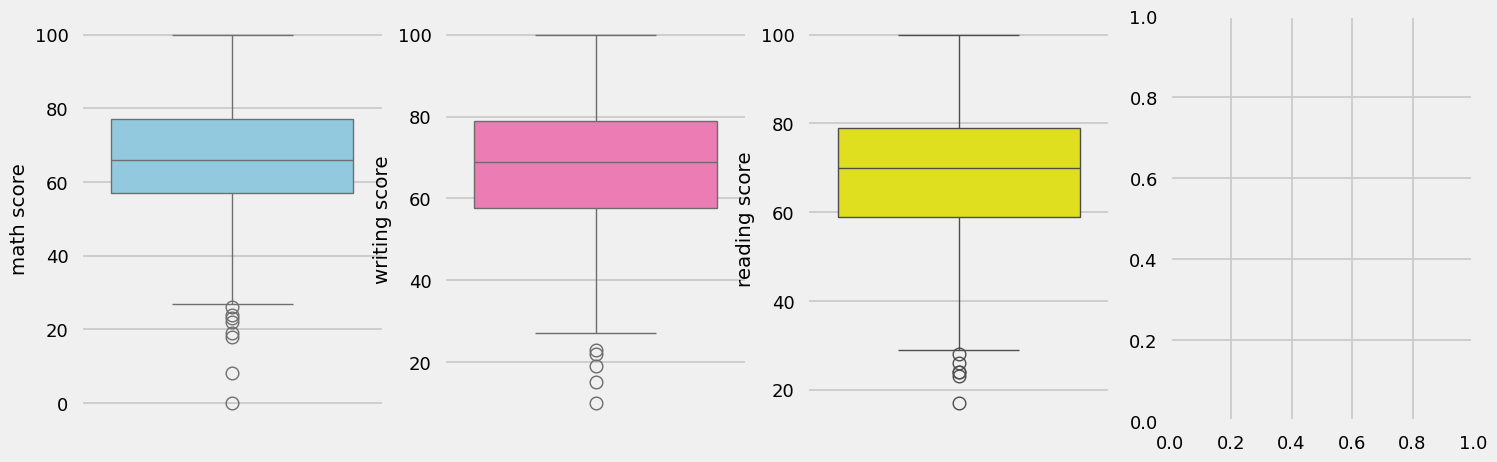

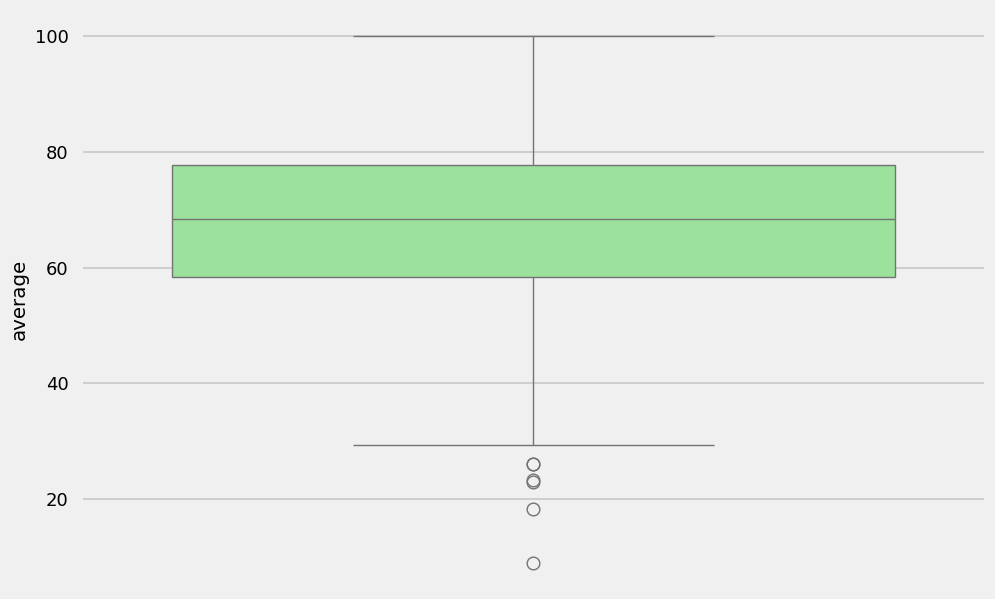

In [91]:
plt.subplots(1, 4, figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['writing score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['reading score'], color='yellow')
plt.show(144)
sns.boxplot(df['average'], color='lightgreen')
plt.show()




Multivariate analysis using pairplot

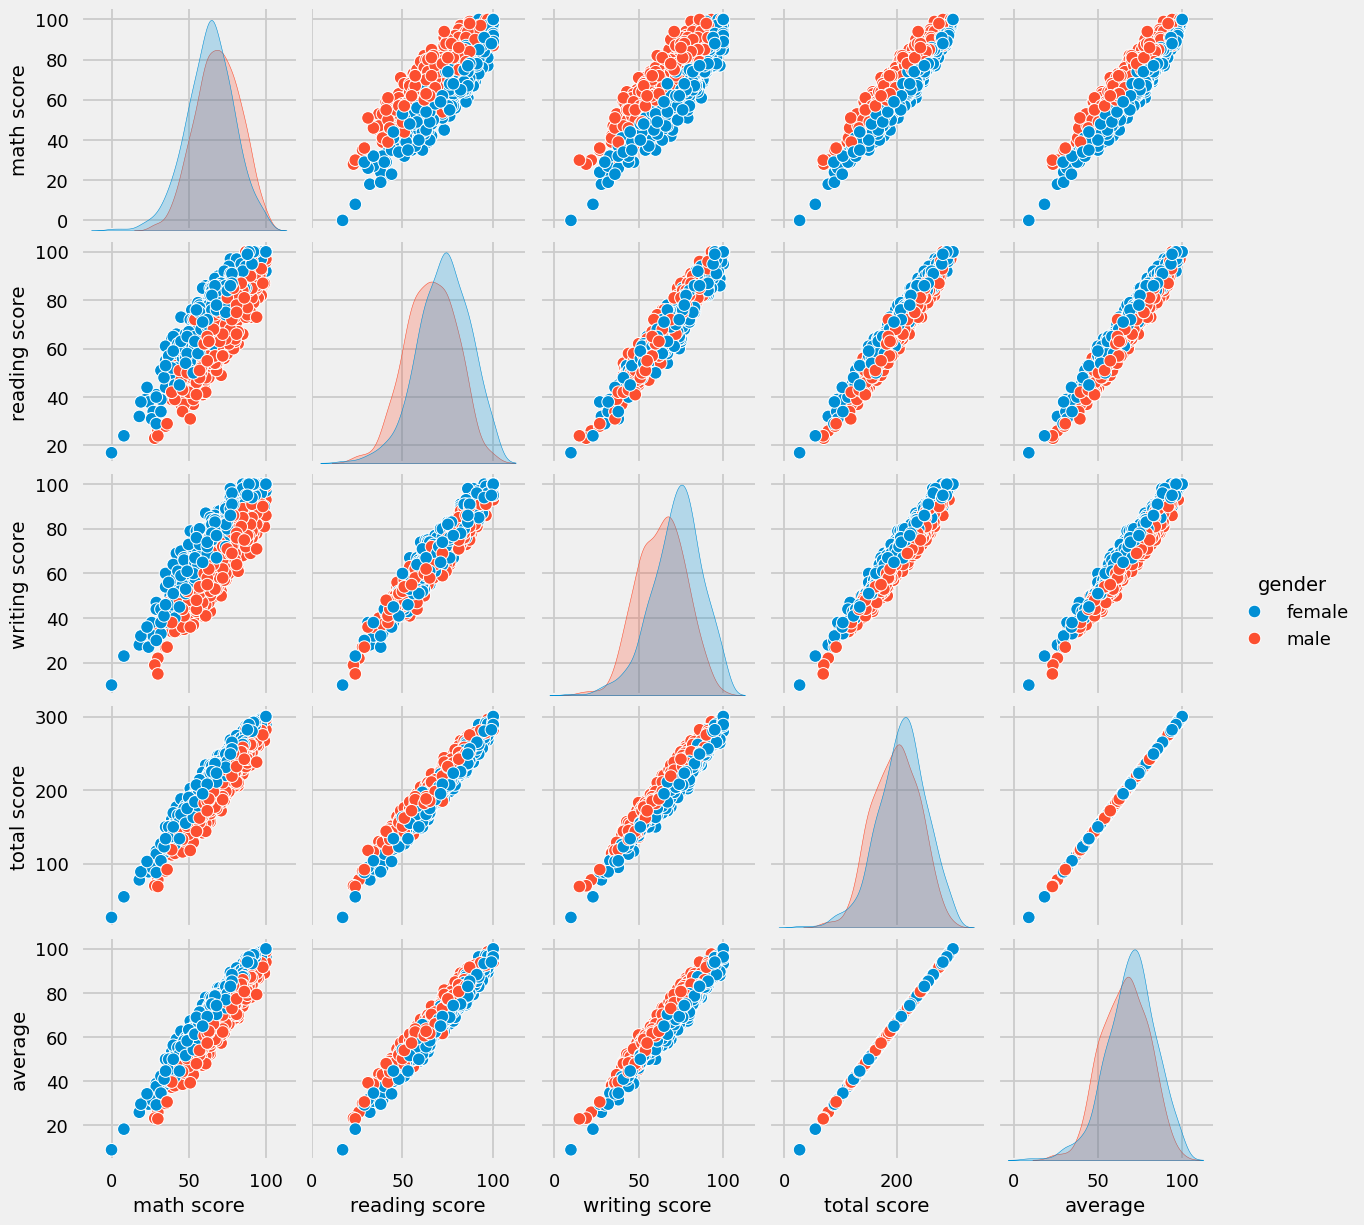

In [92]:
sns.pairplot(df, hue = 'gender')
plt.show()

* From the above plot it is clear that all the scores increase linearly with each other.

Conclusions

* Females lead in pass percentage and also are top-scorers
* Finishing preparation course is beneficial
* Students Performance is realted with lunch, race, parental level eductaion.
* Students performance is not much related with test preparation course